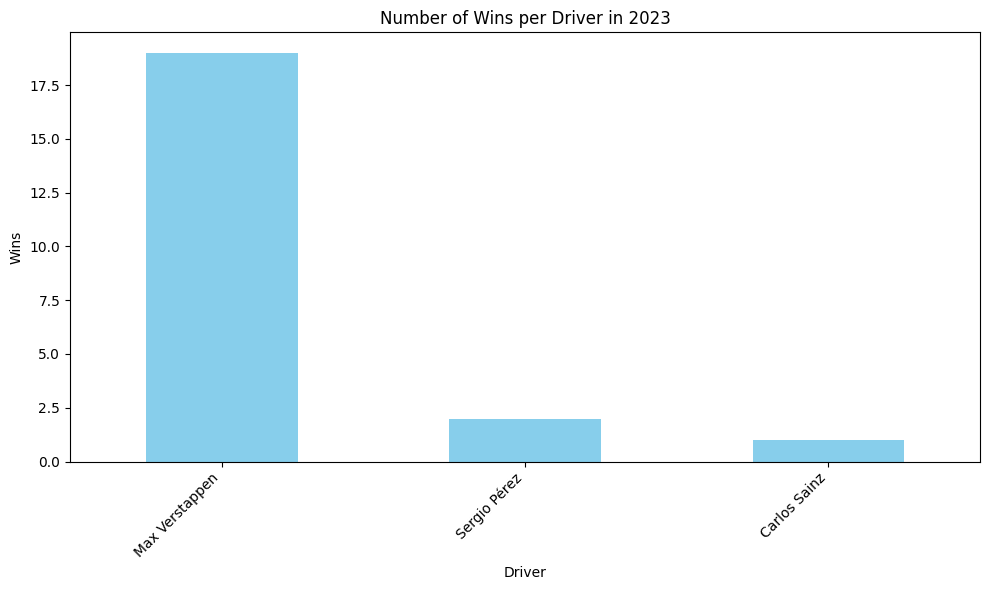

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process_f1_data(year, data_folder="data"):
    """
    Loads and processes Formula 1 race data from CSV files to extract winners for a given year.
    
    Args:
        year (int): The year of the Formula 1 season (e.g., 2023).
        data_folder (str): Path to the folder containing the Kaggle dataset CSV files.
    
    Returns:
        pd.DataFrame: A DataFrame with race winners and their details.
    """
    # Load relevant CSV files
    results = pd.read_csv(f"{data_folder}/results.csv")
    races = pd.read_csv(f"{data_folder}/races.csv")
    drivers = pd.read_csv(f"{data_folder}/drivers.csv")
    
    # Filter races for the specified year
    races_year = races[races['year'] == year]
    
    # Merge results with races to get race names and filter for winners (positionOrder == 1)
    results_year = results[results['raceId'].isin(races_year['raceId']) & (results['positionOrder'] == 1)]
    
    # Merge with drivers to get driver names
    results_with_drivers = results_year.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')
    
    # Create a full name column for drivers
    results_with_drivers['driver'] = results_with_drivers['forename'] + ' ' + results_with_drivers['surname']
    
    # Merge with races to get race names
    winners = results_with_drivers.merge(races[['raceId', 'name']], on='raceId')
    
    return winners[['raceId', 'name', 'driver', 'positionOrder']]

# Specify the year and data folder
year = 2023
data_folder = "data"  # Ensure your CSV files are in a 'data' folder

# Load and process the data
winners = load_and_process_f1_data(year, data_folder)

# Count the number of wins per driver
win_counts = winners['driver'].value_counts()

# Visualize the number of wins per driver
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='skyblue')
plt.title(f'Number of Wins per Driver in {year}')
plt.xlabel('Driver')
plt.ylabel('Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()